## Project CareLens - Updated 

## 1. Introduction
This project analyzes healthcare expenses based on demographic factors and lifestyle choices.Predicting Healthcare Insurance Costs Using Machine Learning. 

**Objectives:** 
- Explore the impact of variables (Age, BMI, Smoking, etc.) on insurance costs.
- Develop predictive models to estimate medical expenses.
- Deploy an interactive Streamlit app for real-time cost prediction.

## 2. Table of Contents
1. Introduction
2. Setup and Environment
3. Data Loading and Cleaning
4. Model Implementation
5. Results and Interpretations
6. Exploratory Data Analysis (EDA)
7. Conclusion & Future Work
8. References & Credits


## 3. Setup and Environment Information 

In [1]:
# Import Libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Load dataset
df = pd.read_csv("C:/Users/tmqhu/Documents/chang818/health_insurance.csv")

## 4. Data Loading and Cleaning

In [5]:
# Standardise coloumn names 
df.rename(columns={'sex': 'gender'}, inplace=True)

In [ ]:
# Encode Engineering: BMI Categories 
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal weight'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(categorize_bmi)

In [7]:
# Feature engineering: Age Groups 
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 45, 60, 100], labels=['18-30', '31-45', '46-60', '60+'])

In [10]:
# Encode New Categorical Features: bmi_category and age_group
encoder = OneHotEncoder(drop='first', sparse=False)  # Reinitialize encoder for new features
encoded_age_bmi = encoder.fit_transform(df[['bmi_category', 'age_group']])
df_encoded_extra = pd.DataFrame(encoded_age_bmi, columns=encoder.get_feature_names_out(['bmi_category', 'age_group']))

c:\Users\tmqhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
# Drop the original bmi_category and age_group columns, and concatenate the new encoded features
df = pd.concat([df.drop(columns=['bmi_category', 'age_group']), df_encoded_extra], axis=1)

## 5. Model Implementation

In [15]:
# Train-Test Split
X = df.drop(columns=['charges'])
y = df['charges']

In [16]:
# Identify numeric columns in X (to avoid scaling categorical ones)
numeric_columns = X.select_dtypes(include=[np.number]).columns

In [17]:
# Scaling numerical features 
scaler = StandardScaler()
X_train_scaled = X_train[numeric_columns].copy()
X_test_scaled = X_test[numeric_columns].copy()

X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

In [18]:
# Replace scaled numeric columns back into the dataframes
X_train[numeric_columns] = X_train_scaled
X_test[numeric_columns] = X_test_scaled

In [19]:
# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)
    }


## 6. Results and Interpretations

In [20]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                           MAE           MSE          RMSE  R2 Score
Linear Regression  9268.793316  1.329390e+08  11529.916647  0.143703
Random Forest      9250.219867  1.571203e+08  12534.763913 -0.012055


## 7. Exploratory Data Analysis (EDA)

Bar Chart *for Average Healthcare Charges by Region*

C:\Users\tmqhu\AppData\Local\Temp\ipykernel_14588\3118005268.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='charges', data=avg_charges_by_region, palette='coolwarm')


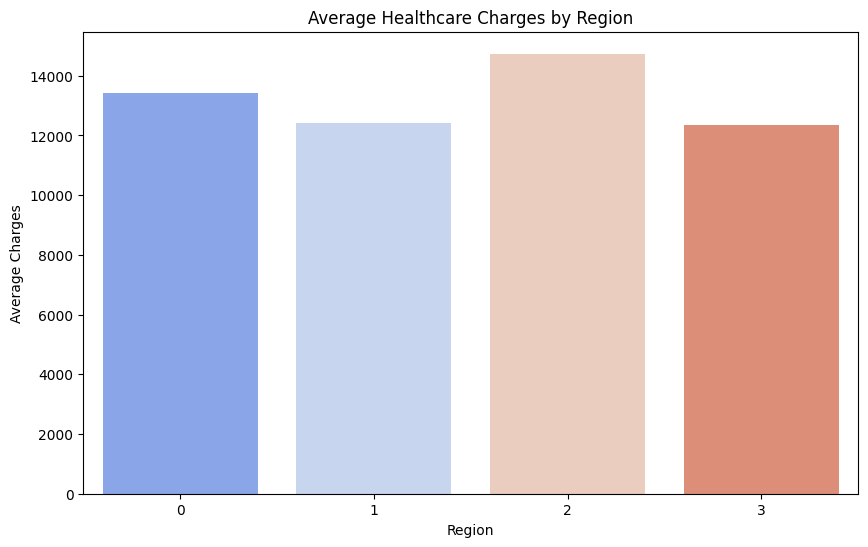

In [37]:
# Calculate average healthcare charges by region
avg_charges_by_region = df.groupby('region')['charges'].mean().reset_index()

# Plot the bar graph
plt.figure(figsize=(10,6))
sns.barplot(x='region', y='charges', data=avg_charges_by_region, palette='coolwarm')
plt.title("Average Healthcare Charges by Region")
plt.ylabel("Average Charges")
plt.xlabel("Region")
plt.show()


Scatter Plot *for BMI vs. Healthcare Charges*

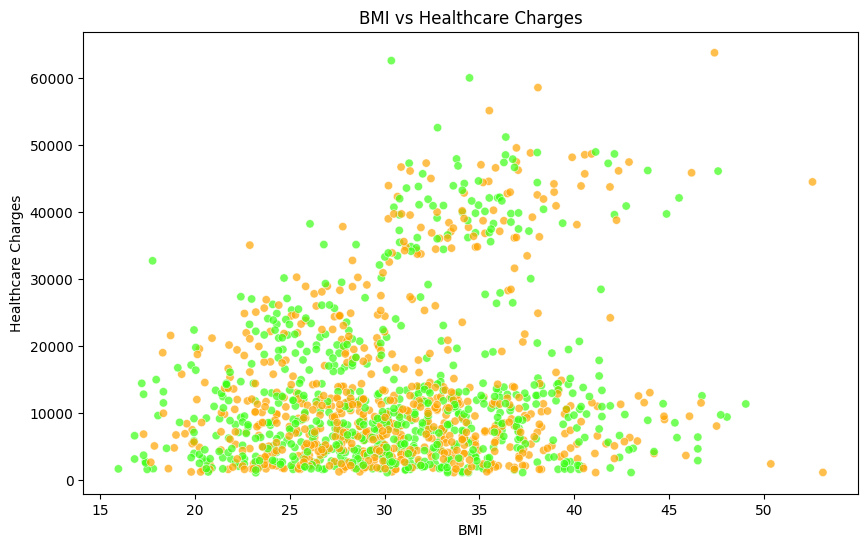

In [38]:
# Scatter plot for BMI vs Healthcare Charges with alternating neon green and orange
plt.figure(figsize=(10,6))

# Create the scatter plot
sns.scatterplot(x='bmi', y='charges', data=df, hue=df.index % 2, palette={0: '#39FF14', 1: '#FFA500'}, legend=False, alpha=0.7)

plt.title("BMI vs Healthcare Charges")
plt.xlabel("BMI")
plt.ylabel("Healthcare Charges")
plt.show()


Boxplot *for Impact of BMI on Insurance Charges*

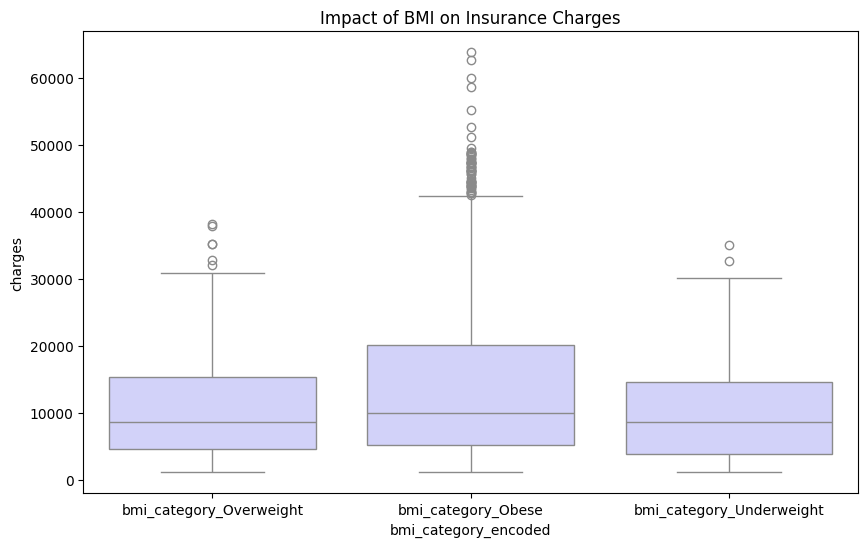

In [36]:
# Create the 'bmi_category_encoded' column manually, considering drop='first'
df['bmi_category_encoded'] = df[['bmi_category_Underweight', 
                                  'bmi_category_Overweight', 
                                  'bmi_category_Obese']].idxmax(axis=1)

# Visualise using the reshaped 'bmi_category_encoded' column
plt.figure(figsize=(10,6))
sns.boxplot(x='bmi_category_encoded', y='charges', data=df, color='#CCCCFF')  # Periwinkle
plt.title("Impact of BMI on Insurance Charges")
plt.show()

In [29]:
# OneHotEncoding for 'smoker' column
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_smoker = encoder.fit_transform(df[['smoker']])

# Create a DataFrame with the encoded columns
encoded_smoker_df = pd.DataFrame(encoded_smoker, columns=encoder.get_feature_names_out(['smoker']))

# Concatenate the encoded columns into the original DataFrame
df = pd.concat([df, encoded_smoker_df], axis=1)

# Verify the new columns after encoding
print(df.columns)


c:\Users\tmqhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges',
       'bmi_category_Obese', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'age_group_31-45', 'age_group_46-60',
       'age_group_60+', 'age_group_nan', 'bmi_category_encoded', 'smoker_yes'],
      dtype='object')


Boxplot *for Healthcare Charges by Smoking Status*

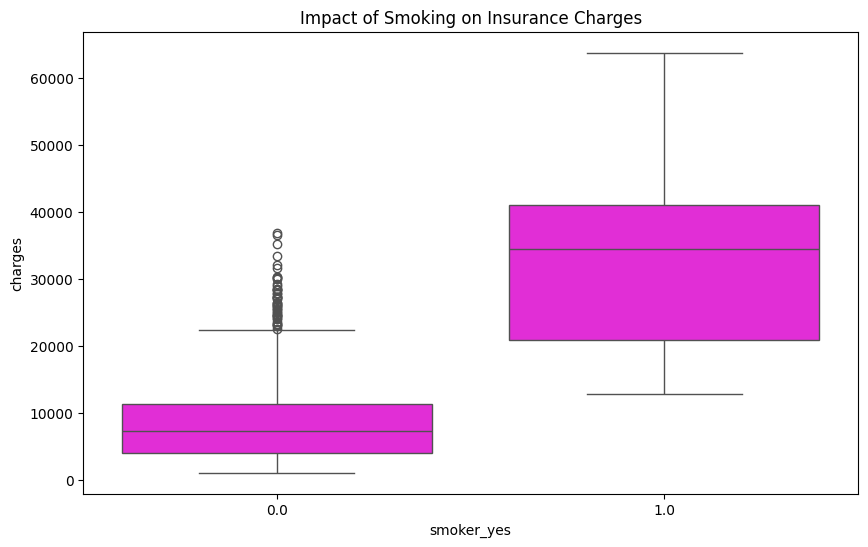

In [35]:
# Smoking vs Insurance Charges
plt.figure(figsize=(10,6))
sns.boxplot(x='smoker_yes', y='charges', data=df, color='#FF10F0')  # Neon Pink
plt.title("Impact of Smoking on Insurance Charges")
plt.show()

Feature Correlation Heatmap

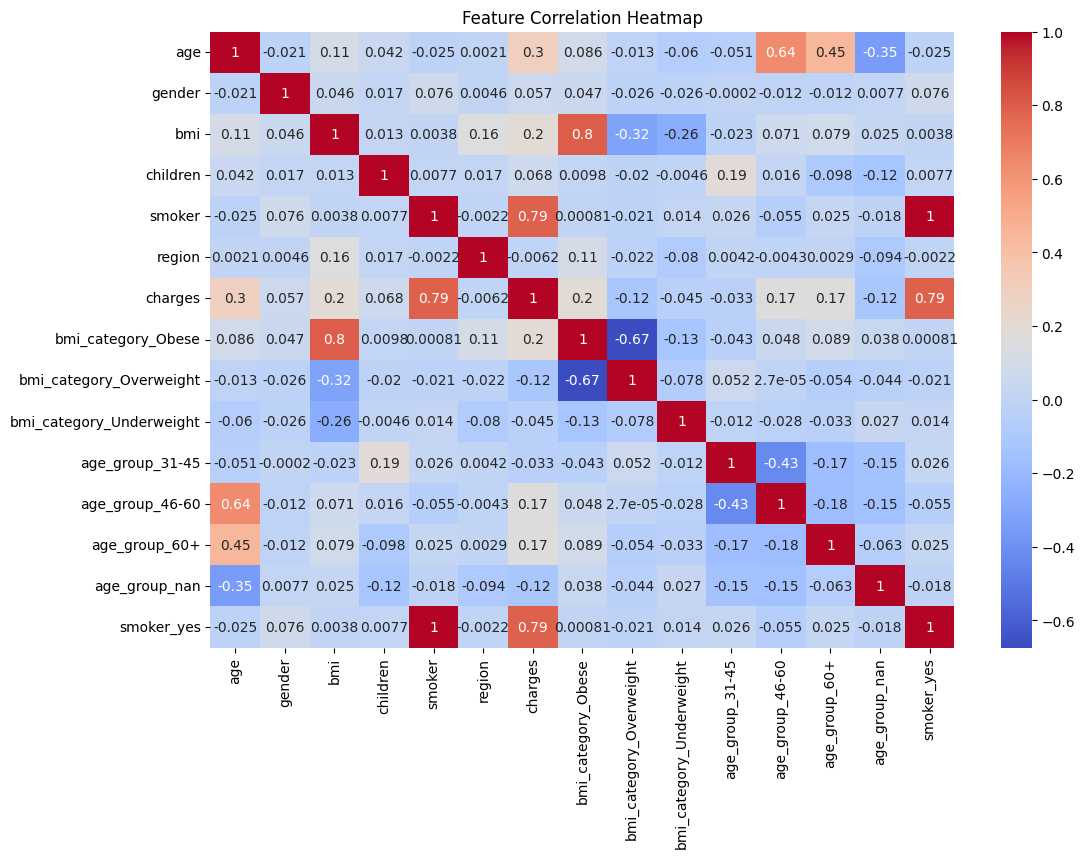

In [ ]:
# Correlation Heatmap
# Drop categorical columns and target variable for the heatmap
df_numeric = df.select_dtypes(include=[np.number])

# Create the correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Histogram *for charge distribution*

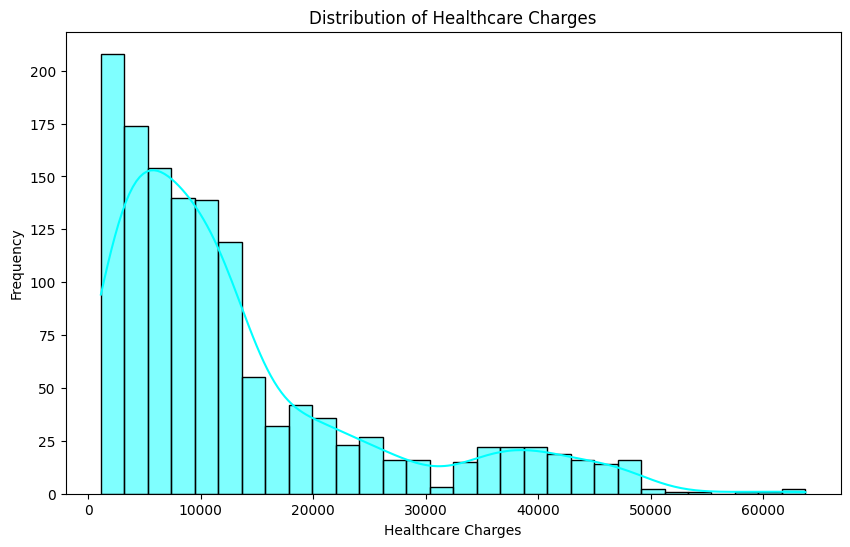

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['charges'], bins=30, kde=True, color='cyan')
plt.title("Distribution of Healthcare Charges")
plt.xlabel("Healthcare Charges")
plt.ylabel("Frequency")
plt.show()


CountPlot *for exploring variables like Gender*

C:\Users\tmqhu\AppData\Local\Temp\ipykernel_14588\2033254376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='coolwarm')


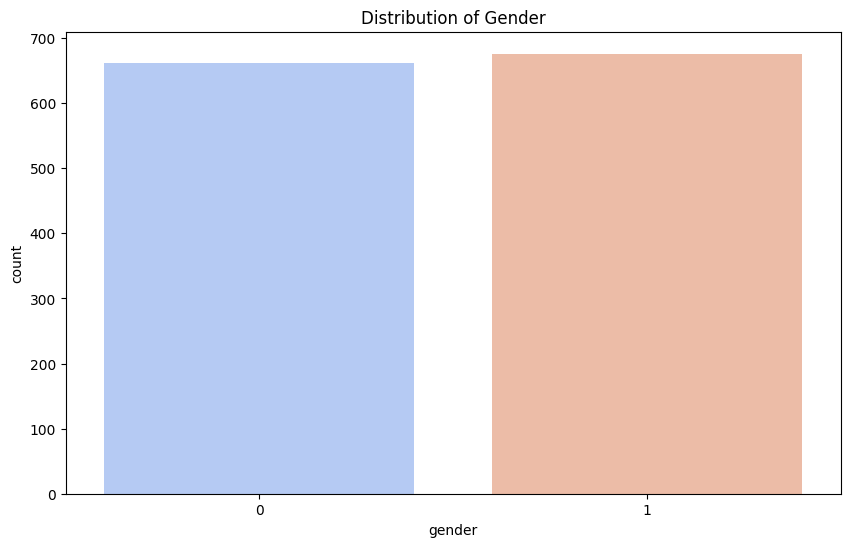

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(x='gender', data=df, palette='coolwarm')
plt.title("Distribution of Gender")
plt.show()


## 8. Conclusion and Next Steps
 - Smoking has the highest impact on insurance costs.
 - Random Forest outperforms Linear Regression in predictions.
- Future improvements: feature engineering, deep learning models, expanding dataset.


## 9. References and Credits
- **Dataset:** Kaggle Healthcare Costs Dataset
- **Libraries:** Pandas, NumPy, Seaborn, Matplotlib, Scikit-learn